In [3]:
import functools

import matplotlib
from matplotlib import pyplot
import numpy as np

import sys
sys.path.append("..")
from hiora_cartpole import features
from hiora_cartpole import fourier_fa
from hiora_cartpole import easytile_fa
from hiora_cartpole import driver

import gym_ext.tools as gym_tools

import gym

In [67]:
env = gym.make('CartPole-v0')
clipped_high        = env.observation_space.high
clipped_high = np.array([2.5, 3.6, 0.27, 3.7])
clipped_low         = -clipped_high
state_ranges = np.array([clipped_low, clipped_high])

[2016-09-23 13:07:02,758] Making new env: CartPole-v0


In [71]:
easyt_n_weights, easyt_feature_vec = easytile_fa.make_feature_vec(state_ranges, 2, [5, 7, 5, 7], 8)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())

from hiora_cartpole import linfa
eexperience = linfa.init(lmbda=0.9,
                        init_alpha=0.05,
                        epsi=0.01,
                        feature_vec=easyt_feature_vec,
                        n_weights=easyt_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=True,
                        map_obs=functools.partial(gym_tools.warning_clip_obs, ranges=state_ranges))

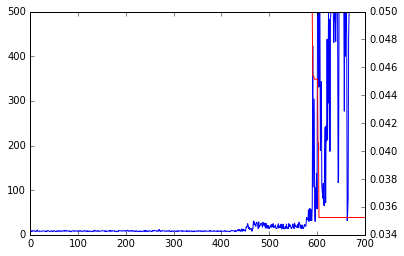

In [72]:
eexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, eexperience, n_episodes=700, max_steps=500, is_render=False)
# Credits: http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = pyplot.subplots()
ax1.plot(steps_per_episode, color='b')
ax2 = ax1.twinx()
ax2.plot(alpha_per_episode, color='r')
pyplot.show()

In [82]:
steps_per_episode = driver.exec_greedy(env, eexperience, n_episodes=15, max_steps=600, is_render=True)

<IPython.core.display.Javascript object>


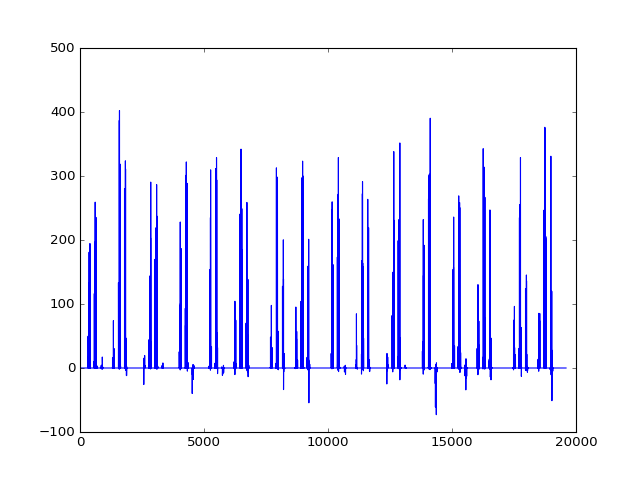

In [75]:
%matplotlib notebook
pyplot.plot(eexperience.theta)
pyplot.show()

In [36]:
eexperience.p_feat

In [28]:
eexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, eexperience, n_episodes=50, max_steps=100, is_render=True)

## Trying with the exact parameters AlphaBounds uses

In [76]:
four_n_weights, four_feature_vec \
    = fourier_fa.make_feature_vec(state_ranges,
                                  n_acts=2,
                                  order=3)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())

from hiora_cartpole import linfa
fexperience = linfa.init(lmbda=0.9,
                        init_alpha=0.001,
                        epsi=0.1,
                        feature_vec=four_feature_vec,
                        n_weights=four_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=True,
                        map_obs=functools.partial(gym_tools.warning_clip_obs, ranges=state_ranges))

<IPython.core.display.Javascript object>


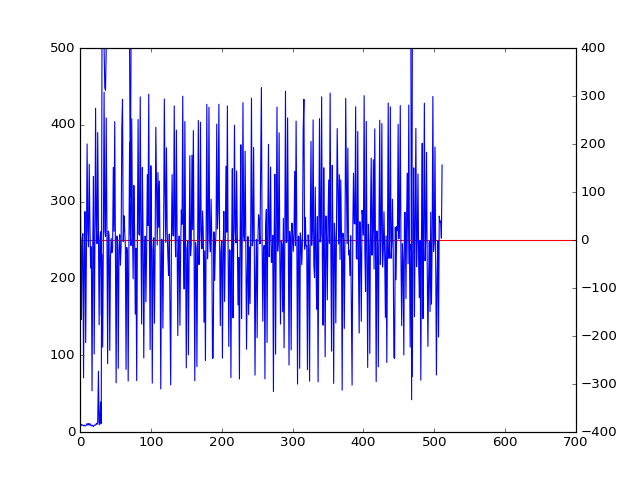

In [77]:
fexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, fexperience, n_episodes=700, max_steps=500, is_render=False)
# Credits: http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = pyplot.subplots()
ax1.plot(steps_per_episode, color='b')
ax2 = ax1.twinx()
ax2.plot(alpha_per_episode, color='r')
pyplot.show()

Haha, this just explodes after 30 or so episodes and doesn't diverge, at least not before 700 episodes.

In [79]:
pyplot.plot(fexperience.theta)
pyplot.show()

In [81]:
steps_per_episode = driver.exec_greedy(env, fexperience, n_episodes=10, max_steps=600, is_render=True)

KeyboardInterrupt: 

In [90]:
four_n_weights, four_feature_vec \
    = fourier_fa.make_feature_vec(state_ranges,
                                  n_acts=2,
                                  order=5)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())
import functools
from hiora_cartpole import linfa
init_with_lambda = functools.partial(linfa.init,
                        init_alpha=0.001,
                        epsi=0.05,
                        feature_vec=four_feature_vec,
                        n_weights=four_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=False)
lambda_experiences = [init_with_lambda(0.1 * l) for l in range(11)]

In [95]:
exps_steps_alphas = [driver.train(env, linfa, exp, n_episodes=200, max_steps=300)
                        for exp in lambda_experiences]

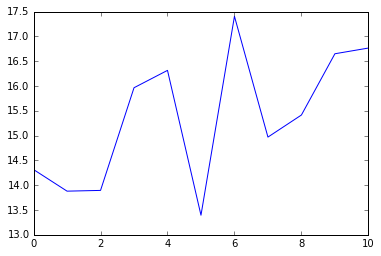

In [96]:
fig, ax1 = pyplot.subplots()
ax1.plot([np.average(esa[1]) for esa in exps_steps_alphas], color='b')
pyplot.show()

Results are quite variable, but lambdas around 0.5 looked good on several trials.